<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_NLP_Power/blob/main/202309_NLP_Poster_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# Enron Dataset
# preprocessed Enrone dataset

import pandas as pd

emails = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_NLP_Power/main/data/Enron_merged_df.csv")

emails["rank_diff"] = emails["Sender_Rank"] - emails["Receiver_Rank"]

emails.head(1)

s_emails = emails[["direction", "content", "rank_diff"]]
s_emails = s_emails.fillna('')
print(s_emails["content"].sample())

135    That's fine with me - I don't anticipate any p...
Name: content, dtype: object


In [91]:
emails[emails["message"].str.contains("Antelope")]

,Receiver_Name,Receiver_Email,Receiver_Position,Receiver_Rank,Sender_Name,Sender_Email,Sender_Position,Sender_Rank,file,message,...,Body,Date,timezone,content,Date_UTC,Sender-Receiver,direction,tokens,cleaned_tokens,rank_diff
1100,Louise Kitchen,louise.kitchen@enron.com,President,5,Christopher Calger,christopher.calger@enron.com,Managing Director,3,kitchen-l/_americas/portland/140.,Message-ID: <12753009.1075840890412.JavaMail.e...,...,That Antelope number was last month (before cl...,"Tue, 17 Apr 2001 14:30:00 -0700 (PDT)",PDT,That Antelope number was last month (before cl...,2001-04-17 21:30:00+00:00,-2,upward,"['that', 'antelop', 'number', 'wa', 'last', 'm...","['antelop', 'number', 'wa', 'last', 'month', '...",-2


In [92]:
s_emails[s_emails["content"].str.contains("Antelope")]

,direction,content,rank_diff
1100,upward,That Antelope number was last month (before cl...,-2


In [147]:
# lemmatize it and make the content as a whole text

import spacy

nlp = spacy.load("en_core_web_sm")
text = " ".join(s_emails["content"])
doc = nlp(text)

stop_words = set(spacy.lang.en.stop_words.STOP_WORDS)

# Extract unique tokens into a list
unique_tokens = list(set(token.text for token in doc if not token.is_punct and token.text.lower() not in stop_words))

# remove empty strings from the list
# unique_tokens = [token for token in unique_tokens if token.strip()] <- to check the original words
unique_tokens = [token.lower() for token in unique_tokens if token.strip()]


# print(unique_tokens)


In [110]:
# concreteness word dictionary

import pandas as pd

# use unigram ones
dic_con = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/Joy_NLP_Power/main/data/Dic_Concretness.csv')
dict_conc = dic_con
# dict_conc = dic_con[dic_con.Bigram == 0][["Word", "Conc.M"]]

# use the average scores as scoring for the Corpus
# make all the words as lower
df_scores = dict_conc
df_scores = df_scores.rename(columns = {"Word":"word", "Conc.M":"score"})
df_scores["word"] = df_scores["word"].str.lower()

In [111]:
# filter the conc words which is in the Enron corpus

filtered_df = df_scores[df_scores["word"].isin(unique_tokens)]
filtered_df

,word,Bigram,score,Conc.SD,Unknown,Total,Percent_known,SUBTLEX
12,abbreviated,0,3.10,1.54,0,30,1.00,16
13,abbreviation,0,3.07,1.51,0,29,1.00,12
29,ability,0,1.81,0.88,0,27,1.00,980
32,able,0,2.38,1.42,1,27,0.96,8155
46,abominable,0,1.89,0.99,2,30,0.93,32
...,...,...,...,...,...,...,...,...
36961,yes,0,2.14,1.27,0,29,1.00,101835
36962,yesterday,0,3.00,1.73,0,29,1.00,4935
37019,zero,0,2.86,1.68,0,29,1.00,1094
37036,zipper,0,4.83,0.54,0,29,1.00,144


In [143]:
conc_words = filtered_df[filtered_df["score"] >= 3.036267 + 1.038602*1.5]
abs_words = filtered_df[filtered_df["score"] <= 3.036267 - 1.038602*1.5]

# conc_words = conc_words[conc_words["word"] != "antelope"]

print(len(conc_words), len(abs_words))

269 43


In [130]:
from PIL import Image, ImageDraw

# Create a circular mask image
mask_size = (800, 800)  # Adjust the size as needed
mask_color = (255, 255, 255)  # White color
mask = Image.new("RGB", mask_size, mask_color)
draw = ImageDraw.Draw(mask)
draw.ellipse((50, 50, mask_size[0] - 50, mask_size[1] - 50), fill=(0, 0, 0))

# Save the circular mask image
mask.save("circle_mask.png")

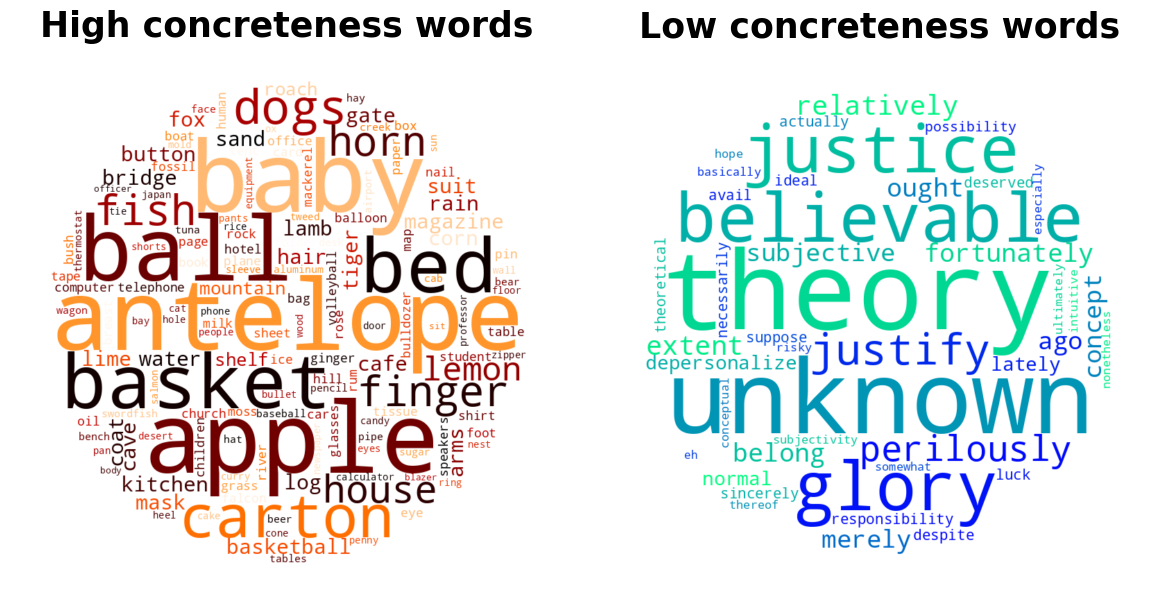

In [144]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

high_score_mask = np.array(Image.open("circle_mask.png"))
low_score_mask = np.array(Image.open("circle_mask.png"))

# Create WordClouds for high and low scores
wordcloud_high_score = WordCloud(
    background_color="white",
    mask=high_score_mask,
    width=800,
    height=800,
    colormap = "gist_heat",
    max_words = 150
).generate_from_frequencies(conc_words.set_index('word')["score"])

wordcloud_low_score = WordCloud(
    background_color="white",
    mask=low_score_mask,
    width=800,
    height=800,
    colormap = "winter",
    max_words = 150
).generate_from_frequencies(abs_words.set_index('word')["score"])

# Create subplots for high and low score word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display high score word cloud
axes[0].imshow(wordcloud_high_score, interpolation="bilinear")
axes[0].set_title('High concreteness words', fontsize=25, fontweight='bold')
axes[0].axis("off")

# Display low score word cloud
axes[1].imshow(wordcloud_low_score, interpolation="bilinear")
axes[1].set_title('Low concreteness words', fontsize=25, fontweight='bold')
axes[1].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

# plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')


In [146]:
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

from google.colab import files
files.download('wordcloud.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

# Others

In [ ]:
integer_score_words["space_count"] = integer_score_words["word"].apply(lambda word: word.count(' '))

integer_score_words = integer_score_words[integer_score_words["space_count"] == 0]

integer_score_words

In [ ]:
3.036267 - 1.038602

In [ ]:

integer_score_words = df_scores[df_scores['score'].astype(int) == df_scores['score']]
integer_score_words.sort_values(by="score", ascending=False)

In [ ]:
def repeat_word(word, score):
    return (' ' + word) * int(score)

integer_score_words['repeated_word'] = integer_score_words.apply(lambda row: repeat_word(row['word'], row['score']), axis=1)
integer_score_words

In [ ]:
integer_score_words[integer_score_words["word"] == "armchair"]

In [ ]:
combined_text = integer_score_words['repeated_word'].str.cat(sep=' ')
combined_text

In [ ]:
from PIL import Image, ImageDraw

# Create a circular mask image
mask_size = (800, 800)  # Adjust the size as needed
mask_color = (255, 255, 255)  # White color
mask = Image.new("RGB", mask_size, mask_color)
draw = ImageDraw.Draw(mask)
draw.ellipse((50, 50, mask_size[0] - 50, mask_size[1] - 50), fill=(0, 0, 0))

# Save the circular mask image
mask.save("circle_mask.png")


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Load your text data (replace with your actual text data)
text_data = combined_text

# Load the circular mask image
mask = np.array(Image.open("circle_mask.png"))

# Create a WordCloud with the circular mask
wordcloud = WordCloud(
    background_color="white",
    mask=mask,
    width=800,
    height=800,
).generate_from_frequencies(integer_score_words.set_index('word')["score"])

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud in Circle Shape')
plt.axis("off")
plt.show()


In [ ]:
# Assuming you have a DataFrame integer_score_words with columns "word" and "score"

# Define a threshold for high and low scores (adjust as needed)
high_score_threshold = 4.1
low_score_threshold = 2

# Create DataFrames for high and low scores
high_score_words = integer_score_words[integer_score_words['score'] >= high_score_threshold]
low_score_words = integer_score_words[integer_score_words['score'] <= low_score_threshold]

# Create masks for high and low scores (adjust the mask creation as needed)
high_score_mask = np.array(Image.open("circle_mask.png"))
low_score_mask = np.array(Image.open("circle_mask.png"))

# Create WordClouds for high and low scores
wordcloud_high_score = WordCloud(
    background_color="black",
    mask=high_score_mask,
    width=800,
    height=800,
    colormap = "gist_heat"
).generate_from_frequencies(high_score_words.set_index('word')["score"])

wordcloud_low_score = WordCloud(
    background_color="black",
    mask=low_score_mask,
    width=800,
    height=800,
    colormap = "winter"
).generate_from_frequencies(low_score_words.set_index('word')["score"])

# Create subplots for high and low score word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display high score word cloud
axes[0].imshow(wordcloud_high_score, interpolation="bilinear")
axes[0].set_title('High concreteness words')
axes[0].axis("off")

# Display low score word cloud
axes[1].imshow(wordcloud_low_score, interpolation="bilinear")
axes[1].set_title('Low concretness words')
axes[1].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

mask = np.array(Image.open())

conc_word_cloud = WordCloud(background_color='white',relative_scaling=1)
conc_word_cloud.generate_from_frequencies(conc_word.set_index('word')["score"])

plt.imshow(conc_word_cloud, interpolation='bilinear')
plt.title('Word cloud with high concreteness score')
plt.axis('off')